# Fall 2021 Week 3 DH Student Check-in Survey

## Outcome Tables

In [1]:
#Import data
F21.StudentCheck.In <- read.csv("~/Dropbox/00-UCLA/Courses/DH125-Stats/Data/F21-StudentCheck-In.csv", comment.char="#")

#To import data into R Studio, download it at: https://www.dropbox.com/s/cfsem4hg1zxsr0g/F21-StudentCheck-In.csv?dl=0
#Then import the csv file through 1 of the 3 methods we discussed in class.

In [19]:
#View the first five rows of the data set
head(F21.StudentCheck.In)

,Class,Timestamp,Transfer_status,Year,Return_Sentiment,Current_Emotion,Stress_Level.1.Low.,Optimism_Level.1.Low.,Primary_Stressor_Simple,Primary_Stressor,Coping_Strategies,Instructor_Suggestions,NA.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,DH_101,10/12/21 9:04,Non-transfer,Sophomore,"Hopeful, Optimistic, Nervous",Hopeful,3,3,New living situation,Adjusting to new living situation,walking,i think this. class is good!,NA
2,DH_101,10/12/21 9:02,Non-transfer,Senior,"Excited, Hopeful, Optimistic",Excited,4,3,Applications,Applying for grad school/internships/jobs,Keeping to a consistent routine,Check in with my group often so that we know whether we are on the right path,NA
3,DH_101,10/12/21 9:03,Non-transfer,Senior,Nervous,Stressed out,5,2,Coursework,Keeping up with coursework,NA,NA,NA
4,DH_101,10/12/21 9:04,Non-transfer,Senior,"Excited, Optimistic, Nervous",Stressed out,4,3,Applications,Applying for grad school/internships/jobs,NA,NA,NA
5,DH_101,10/12/21 9:04,Non-transfer,Senior,"Excited, Uncertain, Nervous",Stressed out,4,3,New living situation,Adjusting to new living situation,Taking time for myself and building a routine,NA,NA
6,DH_101,10/12/21 9:04,Non-transfer,Senior,Excited,Stressed out,4,5,Applications,Applying for grad school/internships/jobs,Working out,I think the instructors are doing well,NA


### If a student is chosen at random what is their likely emotional state?
Use an outcome tables to examine individual probabilities for each emotion.

In [3]:
#Create an outcome table of current emotions when students took the check-in survey
table(F21.StudentCheck.In$Current_Emotion)


      Anxious       Excited Happy/content       Hopeful    Optimistic 
           13             6            12             9             6 
        Other     Sad/upset  Stressed out     Uncertain 
            3             2            26             7 

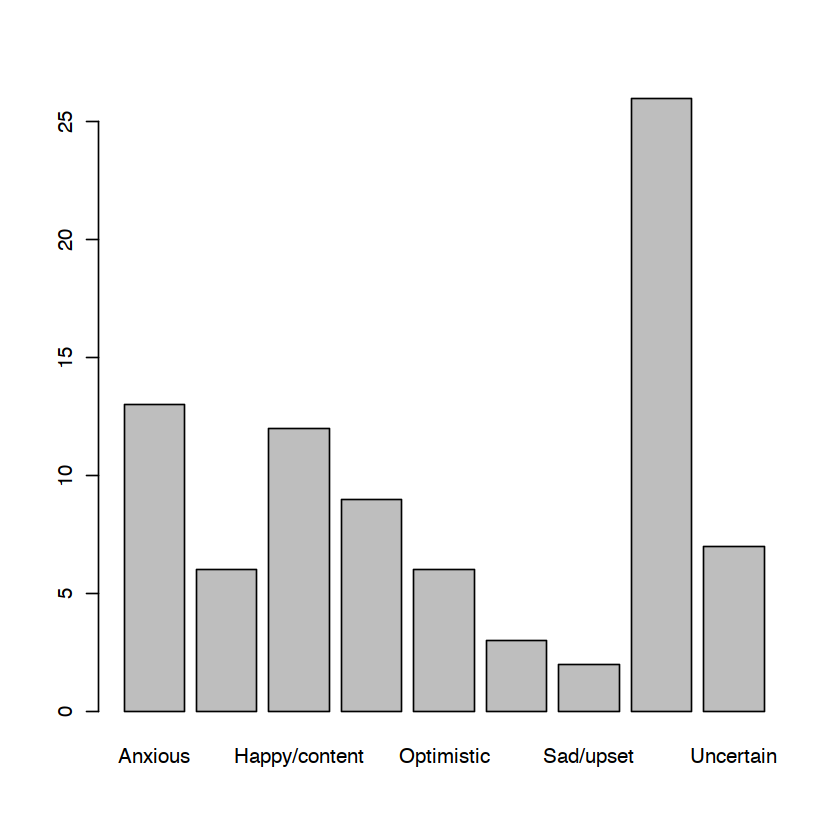

In [4]:
#Create a simple bar plot of current emotions
barplot(table(F21.StudentCheck.In$Current_Emotion))

In [5]:
#Add ggplot2 to your library
library(ggplot2)


The downloaded binary packages are in
	/var/folders/gz/z91916097px8w_wrjg2j6ll00000gr/T//Rtmpjzy6pS/downloaded_packages


### Task
Create a ggplot barplot with flipped coordinates to view the full descriptions of sentiments

### Description
<ul>
    <li>Create a barplot without a y-value by tell R to consider Current_Emotion as a factor.</li>
    <li>Use stat="count" to count the number of instances of each emotional category</li>
    <li>width=.8 sets the width of the bar</li>
    <li>Set theme with theme_minimal or theme_classic. For more, see https://ggplot2.tidyverse.org/reference/ggtheme.html</li>
    <li>Use +coord_flip() to switch the axes so we can read the full descriptions of sentiments</li>
    <li>Then add labels, including a title and x- and y-axis labels.</li>
</ul>

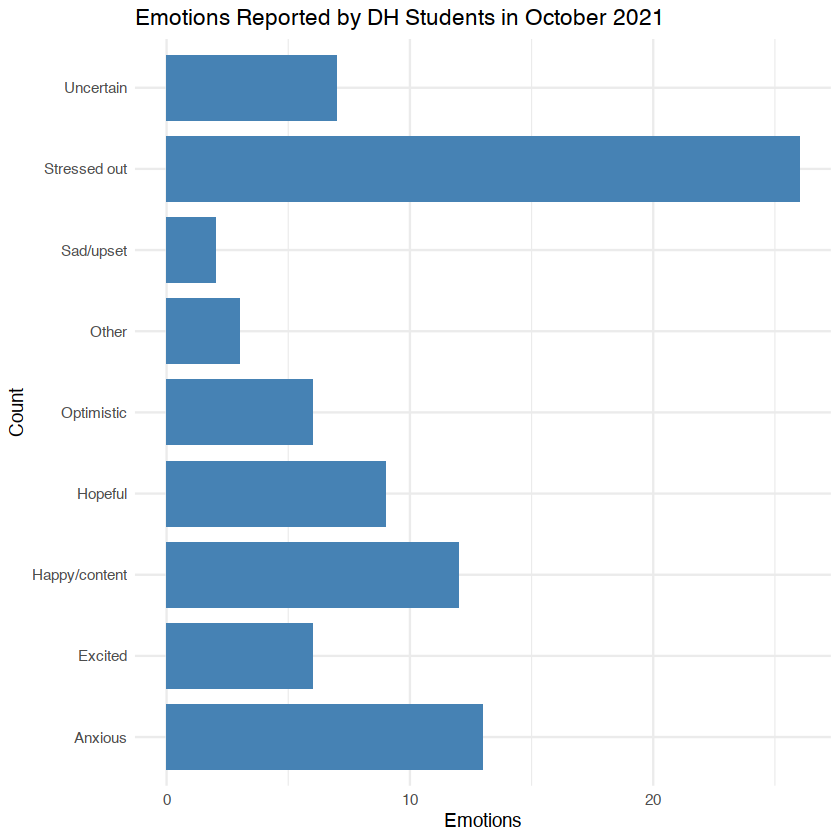

In [6]:
emotions <- ggplot(F21.StudentCheck.In, aes(x=factor(Current_Emotion)))+
  geom_bar(stat="count", width=.8, fill="steelblue")+
  theme_minimal()+coord_flip()
emotions + labs(title="Emotions Reported by DH Students in October 2021", 
                    x="Count", y = "Emotions")

### If a student is chosen at random what is their likely year?

Use an outcome tables to examine individual probabilities for each year

In [11]:
#Create an outcome table for students' years. Remember that you can examine the probabilities of each outcome.

prop.table(table(F21.StudentCheck.In$Year))


    Junior     Senior  Sophomore 
0.34523810 0.64285714 0.01190476 

<strong>Solution:</strong> A student chosen at random is likely a senior, with a probability of 64%. 

# Contingency Tables

In [7]:
#Create a contingency table of students' class and year
table(F21.StudentCheck.In$Class, F21.StudentCheck.In$Year)

        
         Junior Senior Sophomore
  DH_101     25     36         1
  DH_125      4     18         0

In [9]:
#Create a contingency table of students' year and current emotion
yr_emo <- table(F21.StudentCheck.In$Year, F21.StudentCheck.In$Current_Emotion)
yr_emo

           
            Anxious Excited Happy/content Hopeful Optimistic Other Sad/upset
  Junior          6       1             5       3          0     1         0
  Senior          7       5             7       5          6     2         2
  Sophomore       0       0             0       1          0     0         0
           
            Stressed out Uncertain
  Junior              10         3
  Senior              16         4
  Sophomore            0         0

### If a student is chosen at random, what is their likely year and emotional state?
Examine the joint probability table for the Year-Emotion contingency table.

In [10]:
prop.table(yr_emo)

           
               Anxious    Excited Happy/content    Hopeful Optimistic
  Junior    0.07142857 0.01190476    0.05952381 0.03571429 0.00000000
  Senior    0.08333333 0.05952381    0.08333333 0.05952381 0.07142857
  Sophomore 0.00000000 0.00000000    0.00000000 0.01190476 0.00000000
           
                 Other  Sad/upset Stressed out  Uncertain
  Junior    0.01190476 0.00000000   0.11904762 0.03571429
  Senior    0.02380952 0.02380952   0.19047619 0.04761905
  Sophomore 0.00000000 0.00000000   0.00000000 0.00000000

<strong>Solution:</strong> The highest joint probability is for a stressed out senior (19%), so this is the most likely combination.

In [12]:
#Now let's explore students' year and primary stressor with a frequency (raw counts) contingency table.
#Use the simpler classification for the "Primary Stressor" variable.
yr_stressor <- table(F21.StudentCheck.In$Year, F21.StudentCheck.In$Primary_Stressor_Simple)
yr_stressor

           
            Applications Commute/parking Coursework Finances Grief
  Junior               9               0         10        1     1
  Senior              17               2         24        1     1
  Sophomore            0               0          0        0     0
           
            Many commitments New living situation Pandemic
  Junior                   1                    2        0
  Senior                   0                    3        1
  Sophomore                0                    1        0
           
            Racial/ethnic discrimination Relationships work/school balance
  Junior                               1             4                   0
  Senior                               0             4                   1
  Sophomore                            0             0                   0

### If a student is chosen at random, what is their likely year and primary stressor?

In [13]:
#To examine the joint probabilities of both year and primary stressors, use the prop.table function
prop.table(yr_stressor)

           
            Applications Commute/parking Coursework   Finances      Grief
  Junior      0.10714286      0.00000000 0.11904762 0.01190476 0.01190476
  Senior      0.20238095      0.02380952 0.28571429 0.01190476 0.01190476
  Sophomore   0.00000000      0.00000000 0.00000000 0.00000000 0.00000000
           
            Many commitments New living situation   Pandemic
  Junior          0.01190476           0.02380952 0.00000000
  Senior          0.00000000           0.03571429 0.01190476
  Sophomore       0.00000000           0.01190476 0.00000000
           
            Racial/ethnic discrimination Relationships work/school balance
  Junior                      0.01190476    0.04761905          0.00000000
  Senior                      0.00000000    0.04761905          0.01190476
  Sophomore                   0.00000000    0.00000000          0.00000000

If a student is chosen at random, they are likely to be both a senior and to be most stressed out about coursework, with applications a close second.

## Conditional Probabilities: Using the margin argument

### Of the students in each year, which stressors are most often reported as primary?

Examine the phrasing of this question. You need to group the conditional probabilities by student year, which is recorded in rows, so you need to use <strong>margin = 1</strong>.

In [15]:
prop.table(yr_stressor, margin=1)

           
            Applications Commute/parking Coursework   Finances      Grief
  Junior      0.31034483      0.00000000 0.34482759 0.03448276 0.03448276
  Senior      0.31481481      0.03703704 0.44444444 0.01851852 0.01851852
  Sophomore   0.00000000      0.00000000 0.00000000 0.00000000 0.00000000
           
            Many commitments New living situation   Pandemic
  Junior          0.03448276           0.06896552 0.00000000
  Senior          0.00000000           0.05555556 0.01851852
  Sophomore       0.00000000           1.00000000 0.00000000
           
            Racial/ethnic discrimination Relationships work/school balance
  Junior                      0.03448276    0.13793103          0.00000000
  Senior                      0.00000000    0.07407407          0.01851852
  Sophomore                   0.00000000    0.00000000          0.00000000

<strong>Solution:</strong>
<ul>
    <li>The top 3 stressors for juniors are, in order: coursework, applications & relationships.</li>
    <li>The top 3 for seniors are: coursework, applications & relationships</li>
    <li>The top stressor for sophomores is new living situation.</li>
</ul>


### Now let's see which year is most common by stressor:

For this question, we need to examine students' year by stressor, which means we need to group by column, so <strong>margin = 2</strong>.

In [16]:
prop.table(yr_stressor, margin=2)

           
            Applications Commute/parking Coursework  Finances     Grief
  Junior       0.3461538       0.0000000  0.2941176 0.5000000 0.5000000
  Senior       0.6538462       1.0000000  0.7058824 0.5000000 0.5000000
  Sophomore    0.0000000       0.0000000  0.0000000 0.0000000 0.0000000
           
            Many commitments New living situation  Pandemic
  Junior           1.0000000            0.3333333 0.0000000
  Senior           0.0000000            0.5000000 1.0000000
  Sophomore        0.0000000            0.1666667 0.0000000
           
            Racial/ethnic discrimination Relationships work/school balance
  Junior                       1.0000000     0.5000000           0.0000000
  Senior                       0.0000000     0.5000000           1.0000000
  Sophomore                    0.0000000     0.0000000           0.0000000

<strong>Solution:</strong>
<ul>
    <li>Of those concerned about applications, 65% are seniors and 35% are juniors.</li>
    <li>Of those concerned about coursework, 71% are seniors and 29% are juniors.</li>
    <li>Of those concerned about finances, 50% are seniors and 50% are juniors, and the same holds true for grief and relationships.</li>
</ul>

### We can also examine these questions based on transfer status. Try this out as practice.

Be sure to take the time to determine what your results mean and not just your ability to run the code in R.